<a href="https://colab.research.google.com/github/singhnidh/machine-learning-lab/blob/main/MNIST_for_multi_class_classification_the_hand_written_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 #**MNIST for multi-class classification**

**Loading Libraries**

In [ ]:
import tensorflow as tf # deep learning library
import numpy as np # for matrix operations
import matplotlib.pyplot as plt # for visualization
%matplotlib inline

#**Loading Data**
The MNIST dataset is available in the TensorFlow only. Let's load the data:

In [ ]:
from tensorflow.keras.datasets.mnist import load_data # To load the MNIST digit dataset

(X_train, y_train) , (X_test, y_test) = load_data() # Loading data

11490434/11490434 [==============================] - 0s 0us/step


#**Basic EDA**


In [ ]:
print("There are ", len(X_train), "images in the training dataset") # checking total number of records / data points available in the X_train dataset
print("There are ", len(X_test), "images in the test dataset") # checking total number of records / data points available in the X_test dataset

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [ ]:
# Checking the shape of one image
X_train[0].shape

(28, 28)

#**Each image in the dataset is of shape 28X28 numbers (i.e. pixels)**

In [ ]:
# Take a look how one image looks like
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

#**Only numbers! Can't understand what digit does it represent.**

There is a function in matplotlib called as 'matshow()', it helps you to display the image of the array of numbers

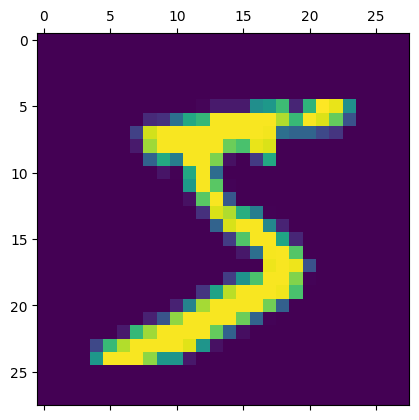

In [ ]:
plt.matshow(X_train[0])

In [ ]:
# we can use y_train to cross check
y_train[0]

5

#Now one can easily say the above number is 5. Well we want to build a model that will tell you what digit does that 28X28 array represent.

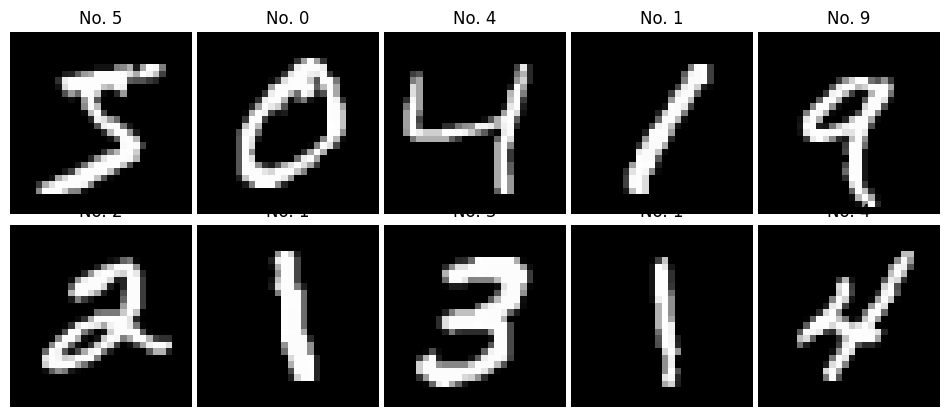

In [ ]:
# code to view the images
num_rows, num_cols = 2, 5
f, ax = plt.subplots(num_rows, num_cols, figsize=(12,5),
gridspec_kw={'wspace':0.03, 'hspace':0.01},
squeeze=True)

for r in range(num_rows):
  for c in range(num_cols):

    image_index = r * 5 + c
    ax[r,c].axis("off")
    ax[r,c].imshow( X_train[image_index], cmap='gray')
    ax[r,c].set_title('No. %d' % y_train[image_index])
plt.show()
plt.close()

#**Data Preprocessing**
#Let's normalize our data (i.e. both X_train and X_test). Normalization is a process that changes the range of pixel intensity values to the range 0 to 1.

#**But why to normalize?**

#The motivation to normalize is to achieve consistency in dynamic range for a set of data, signals, or images to avoid mental distraction and reduce the data redundancy. Also, normalizing the data can help you improve the model performance.

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

"""
Why divided by 255?
The pixel value lie in the range 0 - 255 representing the RGB (Red Green Blue) value. """

'\nWhy divided by 255?\nThe pixel value lie in the range 0 - 255 representing the RGB (Red Green Blue) value. '

Now if you look at the data, each pixel value should be in range 0 to 1.

In [ ]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

#**Flatten the Data**

#We simply convert a 2 dimensional data (i.e. one image data) to 1 dimensional.

#Why to flatten data?

#Before understanding why let's check the shape of the data

In [ ]:
X_train.shape

(60000, 28, 28)

#The data is 3 dimensional. The first value i.e. 60000 is nothing but the number of records or images in this case. The second and third dimension represent each individual image i.e. each image is of shape 28X28.

#Most of the the supervised learning algorithms that execute classification and regression tasks, as well as some deep learning models built for this purposes, are fed with two-dimensional data. Since we have our data as three-dimensional, we will need to flatten our data to make it two-dimensional.

In [ ]:
X_train_flattened = X_train.reshape(len(X_train), 28*28) # converting our 2D array representin an image to one dimensional
X_test_flattened = X_test.reshape(len(X_test), 28*28)

#**Now if you check the shape of our data, it should be 2 dimensional**

In [ ]:
X_train_flattened.shape

(60000, 784)

#**Building Models**
#**Very simple neural network with no hidden layers**

#**Define the model**

In [ ]:
# Defining the Model
model = tf.keras.Sequential([
tf.keras.layers.Dense(10, input_shape=(784,), activation='sigmoid') # The input shape is 784.
])

#The activation function used here is 'sigmoid'. Do you recall why was it so from the Binary Classification Notebook?

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


Generally for multi-class classification problem, it is suggested to use softmax. We tried both softmax activation and sigmoid activation, but sigmoid found to give better performance. You can also try using both and keep the one which gives better performance.

#**Compile the model**

In [ ]:
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

adam is an optimization algorithm which is faster than Stochastic Gradient Descent. If you remember from the learning material of Day 4 (i.e. working of neural networks), we know that Stochastic Gradient Descent (SGD in short) is just a type of Gradient Descent algorithm.

sparse_categorical_crossentropy is a loss function similar to binary_crossentropy (discussed in Binary Classification Notebook), the only difference is that if the target variable is binary we use binary_crossentropy but if your target values are normal integers more then two, use sparse categorical crossentropy. Why not use categorical_crossentropy? You may ask. Well, this article will help you understand it.

The metrics used to evaluate the model is accuracy. Accuracy calculates how often the predictions calculated by the model are correct.

#**Fit the model**

In [ ]:
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 2ms/step - loss: 0.4668 - accuracy: 0.8786
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3030 - accuracy: 0.9157
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2829 - accuracy: 0.9212
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2728 - accuracy: 0.9242
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2666 - accuracy: 0.9258


#**You can play with different number of epochs.**

#**Evaluate the model on unseen data (i.e. X_test_flattened)**

In [ ]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.2676 - accuracy: 0.9253


[0.2676050662994385, 0.9253000020980835]

#The performance of the model on very simple model with no hidden layer is 92.6 %. Not Bad!

#**predict for the X_test**

In [ ]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 1s 2ms/step


array([2.8388521e-02, 3.8674753e-07, 5.1564217e-02, 9.4505280e-01,
       1.6760628e-03, 8.6970128e-02, 1.0591323e-06, 9.9969471e-01,
       8.5975297e-02, 6.1327058e-01], dtype=float32)

The above numbers are the probabilities values for different digits. The maximum probability will confirm what is the predicted digit for first image in X_test.

The value at the 0th index in above array of numbers is saying the probability of the digit being 0.

Generalize: The value at the nth index in above array of numbers is saying the probability of the digit being n

np.argmax finds a maximum element from an array and returns the index of it

In [ ]:
np.argmax(y_predicted[0])

7

The predicted digit is 7.

Let's see the original digit at first index in X_test. Can see this using matshow() function.

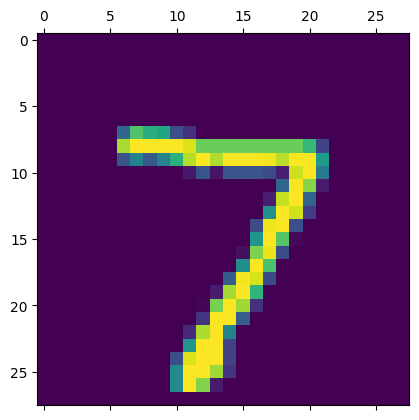

In [ ]:
plt.matshow(X_test[0])

Hence the prediction is correct

#Building Neural Network Model Using hidden layer

In [ ]:
# Defining the model
model = tf.keras.Sequential([
tf.keras.layers.Dense(100, input_shape=(784,), activation='relu'),
tf.keras.layers.Dense(100, input_shape=(100,),activation='relu'),
tf.keras.layers.Dense(10, activation='sigmoid')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 100)               78500     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compiling the model
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

# Fit the model
model.fit(X_train_flattened, y_train, batch_size= 128,epochs=5)

Epoch 1/5
469/469 [==============================] - 3s 3ms/step - loss: 0.3356 - accuracy: 0.9049
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1386 - accuracy: 0.9595
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0975 - accuracy: 0.9705
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0733 - accuracy: 0.9775
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0597 - accuracy: 0.9814


In [ ]:
# Evaluate the model
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0792 - accuracy: 0.9762


[0.07922638207674026, 0.9761999845504761]

#**Saving and loading the model**

In [ ]:
# saving the model
save_dir = "/results/"
model_name = 'keras_mnist.h5'
model.save(model_name)
model_path = save_dir + model_name
print('Saved trained model at %s ' % model_path)

Saved trained model at /results/keras_mnist.h5 
